## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Gaussian Naive Bayes
- Logistic Regression

### <span style="color:purple">Dataset: Titanic_Survived Prediction !</span>

### <span style="color:red">Problem: Classification</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [1]:
# import libraries !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [2]:
# import Dataset !

df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 16)

### Missing Values

In [4]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

age : 0.1987 %
embarked : 0.0022 %
deck : 0.7722 %
embark_town : 0.0022 %
There is no Null Values


In [5]:
df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df = df.drop(['Unnamed: 0', 'deck'], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [7]:
df['age'] = df['age'].replace(np.nan, df.age.mean())
df['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

### Categorical feature 

In [8]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

6


['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']

In [9]:
df = df.dropna()

In [10]:
df.shape

(889, 14)

In [11]:
# encode the catagorical variables !

le = LabelEncoder()

feature = [i for i in df if i not in ['fare','survived','pclass','age','sibsp','parch','fare']]
for i in feature :
    df[i]= le.fit_transform(df[i])

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [12]:
# transform (scaling data) !

scaling = MinMaxScaler()

scale_feature = [x for x in df if x  in ['age','fare']]
df[scale_feature] = scaling.fit_transform(df[scale_feature])
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,0.271174,1,0,0.014151,2,2,1,1,2,0,0
1,1,1,0,0.472229,1,0,0.139136,0,0,2,0,0,1,0
2,1,3,0,0.321438,0,0,0.015469,2,2,2,0,2,1,1
3,1,1,0,0.434531,1,0,0.103644,2,0,2,0,2,1,0
4,0,3,1,0.434531,0,0,0.015713,2,2,1,1,2,0,1


In [13]:
X = df.drop('survived', axis=1)
y = df[['survived']]

In [14]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,0.271174,1,0,0.014151,2,2,1,1,2,0,0
1,1,0,0.472229,1,0,0.139136,0,0,2,0,0,1,0
2,3,0,0.321438,0,0,0.015469,2,2,2,0,2,1,1
3,1,0,0.434531,1,0,0.103644,2,0,2,0,2,1,0
4,3,1,0.434531,0,0,0.015713,2,2,1,1,2,0,1


In [15]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [29]:
print("Data:", df.shape)

Data: (889, 14)


***

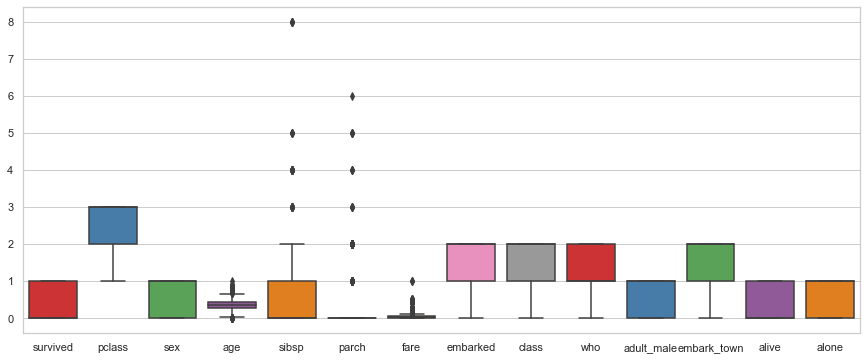

In [30]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

## Model Building

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***

### <span style="color:cyan">Step: 05</span>: Techniques !

## Decision tree !

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model


DecisionTreeClassifier()

### Evaluate or Test Model Accuracy

In [20]:
predicted_values = dt_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

dt_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:",dt_score)


Decision tree: 100.0


***

***

## Random Forest tree !

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model


C:\Users\fahad\AppData\Local\Temp/ipykernel_1456/4111477682.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### Evaluate or Test Model Accuracy

In [22]:
predicted_values = rf_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

rf_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", rf_score)


Random Forest: 100.0


***

***

## Gaussian Naive Bayes !

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model


c:\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Evaluate or Test Model Accuracy

In [24]:
predicted_values = gnb_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

gnb_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("GaussianNB:", gnb_score)


GaussianNB: 100.0


***

***

### <span style="color:cyan">Step: 05</span>: Fit Logistic Regression !

In [25]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model


c:\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### <span style="color:cyan">Step: 06</span>: Evaluate or Test Model Accuracy

In [26]:
import numpy as np

lr_score = np.round(lr_model.score(X_test, y_test)*100, 2)
print("Logistic Regression:", lr_score)


Logistic Regression: 100.0


***

***

In [27]:
data={'Decesion Tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian Naive Bayes'     :[gnb_score],
      'Logistic Regression'      :[lr_score]
}

In [28]:
Evaluation =pd.DataFrame(data, index=['Score'])
Evaluation

,Decesion Tree,Random Forest,Gaussian Naive Bayes,Logistic Regression
Score,100.0,100.0,100.0,100.0


***

***